# ***Customer Analysis for Retail***

## *Business problem:*

### A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.
### Create a report and display the below calculated metrics, reports and inferences.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#set the graphs to show in the notebook
%matplotlib inline

In [4]:
# set seaborn graphs to a better style
sns.set(style = "ticks")

In [5]:
# Read data
Customers = pd.read_csv('Customer.csv')
Transactions = pd.read_csv('Transactions.csv')
Product_heirarchy = pd.read_csv('prod_cat_info.csv')

In [6]:
Customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [7]:
Customers.describe()

,customer_Id,city_code
count,5647.000000,5645.000000
mean,271037.281034,5.472631
std,2451.261711,2.859918
min,266783.000000,1.000000
25%,268912.000000,3.000000
50%,271028.000000,5.000000
75%,273180.000000,8.000000
max,275265.000000,10.000000


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [9]:
Customers.loc[Customers['Gender'].isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0


In [10]:
Customers.loc[Customers['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [11]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [12]:
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [13]:
Transactions.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [14]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [15]:
Product_heirarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [16]:
Product_heirarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [17]:
Product_heirarchy.rename(columns = {"prod_sub_cat_code":"prod_subcat_code"},inplace = True)

# **1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.**

In [18]:
# Merging Datasets transaction and product_heirarchy with the help of left join and assigning it to variable df

df = pd.merge(left=Transactions,right=Product_heirarchy,on=['prod_cat_code','prod_subcat_code'],how='left')

In [19]:
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [20]:
df.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [21]:
Customer_Final = pd.merge(left=df,right=Customers,left_on='cust_id',right_on='customer_Id',how='left')

In [22]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [23]:
Customer_Final.shape

(23053, 16)

In [24]:
Transactions.shape

(23053, 10)

In [25]:
print('''Rows of both "Customer_Final" & "Transaction" are same. That means all transactions done are present
in Customers_Final
''')

Rows of both "Customer_Final" & "Transaction" are same. That means all transactions done are present
in Customers_Final



In [26]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [27]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [28]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])

In [29]:
Customer_Final['DOB']

0       1981-09-26
1       1973-11-05
2       1992-07-27
3       1981-08-06
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [30]:
Customer_Final['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [31]:
Customer_Final.duplicated().sum()

13

In [32]:
Customer_Final = Customer_Final.drop_duplicates()

In [33]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [34]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

# **2. Prepare a summary report for the merged data set.**
### **a. Get the column names and their corresponding data types**

In [35]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [36]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

### **b. Top/Bottom 10 observations**


In [37]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [38]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


### **c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [39]:
Customer_Final.describe().loc[['min','25%','50%','75%','max']]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
min,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,266783.00,1.0
25%,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,268935.00,3.0
50%,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,270980.50,5.0
75%,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,273114.25,8.0
max,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,275265.00,10.0


In [40]:
# OR
quant = Customer_Final.quantile([0,0.25,0.5,0.75,1])
Q1 = quant.loc[0.25]
Q3 = quant.loc[0.75]
Min = quant.loc[0]
Meadian = quant.loc[0.5]
Max = quant.loc[1]

In [41]:
quant

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
0.00,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,266783.00,1.0
0.25,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,268935.00,3.0
0.50,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,270980.50,5.0
0.75,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,273114.25,8.0
1.00,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,275265.00,10.0


### **d. Frequency tables for all the categorical variables**

In [42]:
quant.corr()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
transaction_id,1.000000,0.999939,0.984596,0.991514,0.914974,0.922984,0.939006,0.939431,0.999939,0.997288
cust_id,0.999939,1.000000,0.984540,0.990129,0.914664,0.923353,0.941593,0.941401,1.000000,0.997248
prod_subcat_code,0.984596,0.984540,1.000000,0.967938,0.855994,0.869522,0.936578,0.889005,0.984540,0.994789
prod_cat_code,0.991514,0.990129,0.967938,1.000000,0.915976,0.915089,0.903944,0.915312,0.990129,0.985136
Qty,0.914974,0.914664,0.855994,0.915976,1.000000,0.997577,0.762290,0.971503,0.914664,0.893337
Rate,0.922984,0.923353,0.869522,0.915089,0.997577,1.000000,0.786709,0.983553,0.923353,0.903807
Tax,0.939006,0.941593,0.936578,0.903944,0.762290,0.786709,1.000000,0.863299,0.941593,0.942121
total_amt,0.939431,0.941401,0.889005,0.915312,0.971503,0.983553,0.863299,1.000000,0.941401,0.921928
customer_Id,0.999939,1.000000,0.984540,0.990129,0.914664,0.923353,0.941593,0.941401,1.000000,0.997248
city_code,0.997288,0.997248,0.994789,0.985136,0.893337,0.903807,0.942121,0.921928,0.997248,1.000000


In [43]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [44]:
Customer_Final.loc[:,Customer_Final.dtypes=='object']

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


In [45]:
Frequency_table = Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

In [46]:
Frequency_table

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


In [47]:
Customer_Final.loc[:,Customer_Final.dtypes=='object']['Store_type'].unique()

array(['e-Shop', 'TeleShop', 'MBR', 'Flagship store'], dtype=object)

# **3. Generate histograms for all continuous variables and frequency bars for categorical variables.**

In [48]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

In [49]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


### **Histograms for continuous variables**

In [50]:
Continuous_variables = Customer_Final.loc[:,["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt"]]

In [51]:
Continuous_variables

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,5,3,-5,-1497,785.925,-8270.925
2,6,5,-2,-791,166.110,-1748.110
3,11,6,-3,-1363,429.345,-4518.345
4,6,5,-2,-791,166.110,-1748.110
...,...,...,...,...,...,...
23048,12,5,1,1264,132.720,1396.720
23049,4,1,1,677,71.085,748.085
23050,2,6,4,1052,441.840,4649.840
23051,11,5,3,1142,359.730,3785.730


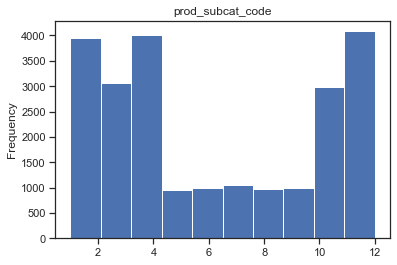

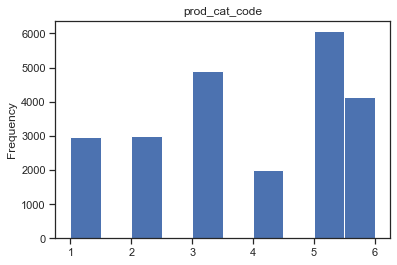

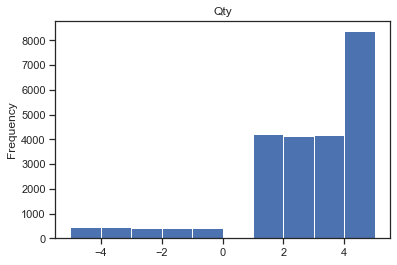

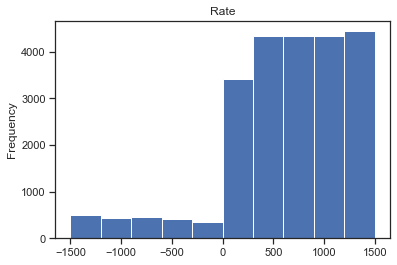

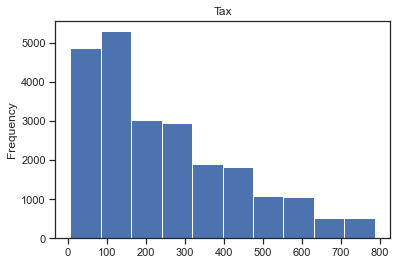

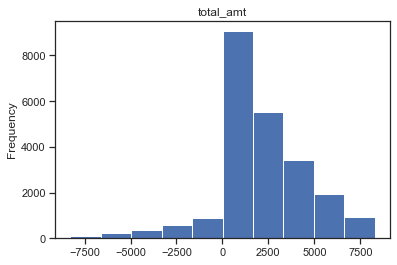

In [52]:
for var in Continuous_variables.columns:
    Continuous_variables[var].plot(kind='hist')
    plt.title(var)
    plt.show()

### **Bar chart for Categorical Variables**

In [53]:
Categorical_variables = Customer_Final.loc[:,Customer_Final.dtypes=='object']

In [54]:
Categorical_variables

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


In [55]:
Categorical_variables.describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


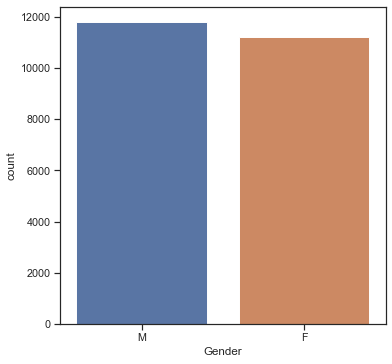

In [56]:
plt.figure(figsize=(6,6),dpi=70)
sns.countplot(Categorical_variables['Gender'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


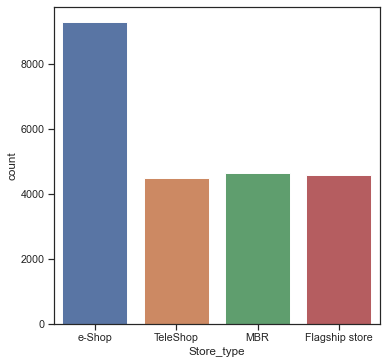

In [57]:
plt.figure(figsize=(6,6),dpi=70)
sns.countplot(Categorical_variables['Store_type'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


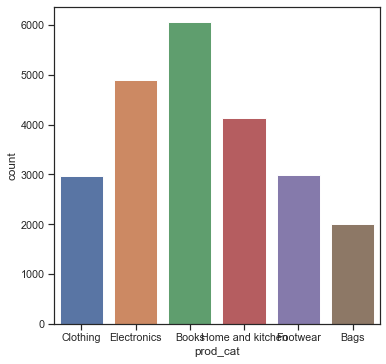

In [58]:
plt.figure(figsize=(6,6),dpi=70)
sns.countplot(Categorical_variables['prod_cat'])
plt.show()

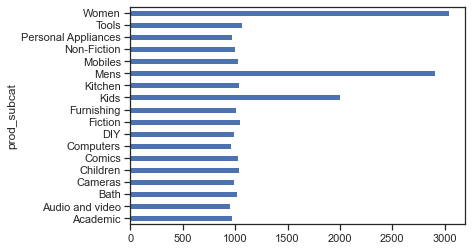

In [59]:
Categorical_variables.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.show()

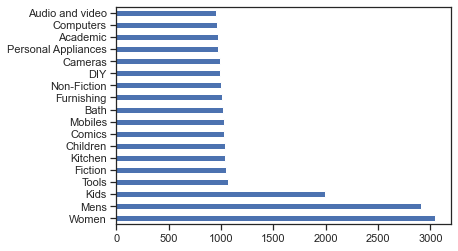

In [60]:
Categorical_variables['prod_subcat'].value_counts().plot(kind='barh')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


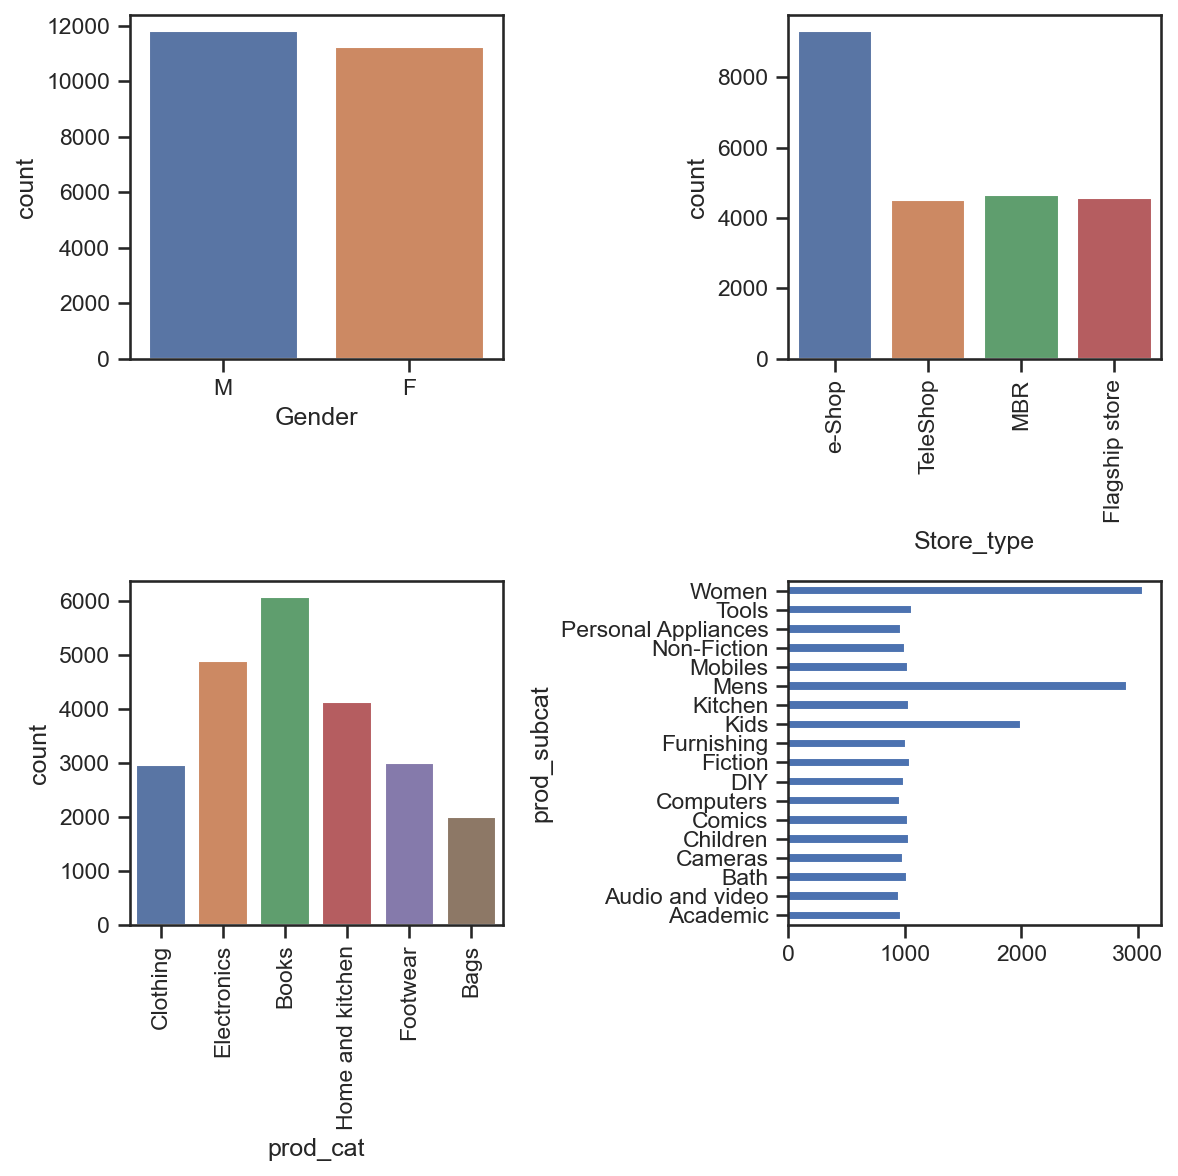

In [61]:

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8),dpi=150)
sns.countplot(Categorical_variables['Gender'],ax=axes[0,0])
sns.countplot(Categorical_variables['Store_type'],ax=axes[0,1])
sns.countplot(Categorical_variables['prod_cat'],ax=axes[1,0])
axes[0,1].tick_params(axis='x',rotation=90)
axes[1,0].tick_params(axis='x',rotation=90)
Categorical_variables.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.tight_layout()
plt.show()

# **4. Calculate the following information using the merged dataset**

### **a. Time period of the available transaction data**

In [62]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

In [63]:
Customer_Final.sort_values(by='tran_date',ascending=False)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
146,17146707816,274897,2014-12-02,12,5,3,622,195.930,2061.930,MBR,Books,Academic,274897,1987-09-16,M,2.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-08-11,M,4.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-08-04,F,1.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-03-12,F,9.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0


In [64]:
Start_date = Customer_Final['tran_date'].min()
End_date = Customer_Final['tran_date'].max()

In [65]:
print("Time period of the available transaction data is from " + pd.Timestamp.strftime(Start_date,format = "%d-%m-%Y") + " to " + pd.Timestamp.strftime(End_date,format = "%d-%m-%Y"))


Time period of the available transaction data is from 02-01-2011 to 02-12-2014


### **b. Count of transactions where the total amount of transaction was negative**

In [66]:
Customer_Final.loc[Customer_Final['total_amt'] < 0,'transaction_id'].count()

2164

# **5. Analyze which product categories are more popular among females vs male customers**

In [67]:
Popular_product = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

In [68]:
Popular_product.pivot(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


# **6. Which City code has the maximum customers and what was the percentage of customers from that city?**

In [69]:
Cust_grp = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values()

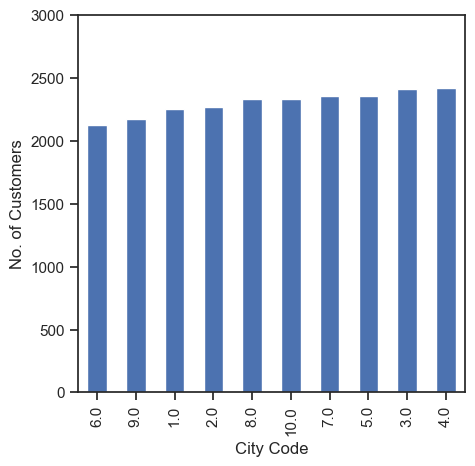

In [70]:
plt.figure(figsize=(5,5),dpi=100)
Cust_grp.plot(kind='bar')
plt.xlabel("City Code")
plt.ylabel("No. of Customers")
plt.yticks(np.arange(0 , 3500, step = 500))
plt.show()

In [82]:
Percentage = Cust_grp.max()*100/Cust_grp.sum()
Percentage

10.515804098645363

# **7. Which store type sells the maximum products by value and by quantity?**

In [72]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [77]:
Customer_Final.groupby('Store_type')[['Qty','total_amt']].sum().sort_values(by=['Qty','total_amt'],ascending=False)

,Qty,total_amt
Store_type,,
e-Shop,22790,1.984262e+07
MBR,11195,9.674941e+06
Flagship store,11142,9.721597e+06
TeleShop,10993,9.372134e+06


In [83]:
print("e-Shop sells the maximum products by value and by quantity")

e-Shop sells the maximum products by value and by quantity


# **8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?**

In [89]:
Flagship = Customer_Final[Customer_Final['Store_type']=='Flagship store']

In [99]:
Flagship.groupby('prod_cat').sum().loc[['Clothing','Electronics']]['total_amt'].sum()

3409559.2700000005

# **9. What was the total amount earned from "Male" customers under the "Electronics" category?**

In [101]:
Gender_grp = Customer_Final.pivot_table(index='Gender',columns='prod_cat',values='total_amt', aggfunc='sum')

In [104]:
Gender_grp['Electronics'].loc['F']

5019354.210000001

# **10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?**

In [105]:
Positive_amt = Customer_Final[Customer_Final['total_amt']>0]

In [106]:
Positive_amt.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0


In [116]:
Positive_amt['transaction_id']

10       29258453508
11       25455265351
12        1571002198
14       36554696014
15       56814940239
            ...     
23048    94340757522
23049    89780862956
23050    85115299378
23051    72870271171
23052    77960931771
Name: transaction_id, Length: 20876, dtype: int64

In [117]:
Positive_amt['transaction_id'].drop_duplicates()
# No duplicates

10       29258453508
11       25455265351
12        1571002198
14       36554696014
15       56814940239
            ...     
23048    94340757522
23049    89780862956
23050    85115299378
23051    72870271171
23052    77960931771
Name: transaction_id, Length: 20876, dtype: int64

In [128]:
Unique_Trans = Positive_amt.groupby(["customer_Id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()
Unique_Trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [129]:
Unique_trans_count = Unique_Trans.groupby("customer_Id")["transaction_id"].count().reset_index()
Unique_trans_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [130]:
Unique_trans_count[Unique_trans_count["transaction_id"]>10]


,customer_Id,transaction_id


In [131]:
print("There are no unique transactions greater than 10")

There are no unique transactions greater than 10


# **11. For all customers aged between 25 - 35, find out:**
### **a. What was the total amount spent for “Electronics” and “Books” product categories?**

In [133]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

In [135]:
today = date.today()

In [139]:
now = pd.Timestamp('now')
now

Timestamp('2021-11-10 11:18:17.137526')

In [142]:
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] - np.timedelta64(100, 'Y')) # 2 
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

<ipython-input-142-fca7e6cbb179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] - np.timedelta64(100, 'Y')) # 2
<ipython-input-142-fca7e6cbb179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')


In [143]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,40.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,48.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,40.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,49.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,37.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,45.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,51.0


In [144]:
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

<ipython-input-144-ffba87e850bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)


In [145]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,48.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,40.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35


In [155]:
Customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat']).sum()

In [159]:
Customer_25_35.loc['25-35']['total_amt'].loc[['Books','Electronics']]

prod_cat
Books          3782096.760
Electronics    3426970.755
Name: total_amt, dtype: float64

### **b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [161]:
Customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_cat']=='25-35']
Customer_total_amount_25_35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,35.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,32.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-02-01,F,6.0,29.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,268885,1989-04-14,F,6.0,32.0,25-35
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0,32.0,25-35
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,1992-11-24,M,9.0,28.0,25-35
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,Bags,Women,274306,1989-12-01,M,2.0,31.0,25-35


In [163]:
total_amount = Customer_total_amount_25_35[(Customer_total_amount_25_35['tran_date'] >='2014-01-01') & (Customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount['total_amt'].sum()

507802.75